In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
 
import tensorflow as tf
import random as rn
from tensorflow import keras

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

# Python script for confusion matrix creation.
import itertools 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

Using TensorFlow backend.


In [0]:
Apple___Apple_scab_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Apple___Apple_scab'
Apple___Black_rot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Apple___Black_rot'
Grape___Black_rot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Grape___Black_rot'
Grape___Esca_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Grape___Esca_(Black_Measles)'
Grape___Leaf_blight_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
Potato___Early_blight_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Potato___Early_blight'
Potato___Late_blight_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Potato___Late_blight'
Tomato___Bacterial_spot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Tomato___Bacterial_spot'
Tomato___Septoria_leaf_spot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Tomato___Septoria_leaf_spot'
Tomato___Target_Spot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Tomato___Target_Spot'

X=[]
Z=[]

NUM_CLASSES = 10
CHANNELS = 3
IMG_SIZE = 224

RESNET50_POOLING = 'avg'
RESNET50_WEIGHTS = 'imagenet'
DENSE_LAYER_ACTIVATION = 'relu'
OUTPUT_DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'
LOSS_METRICS = ['accuracy']

LEARNING_RATE = 0.001
BETA1 = 0.9
BETA2 = 0.999

NUM_EPOCHS = 5
BATCH_SIZE = 32

In [0]:
def assign_label(img,plantdisease_type):
    return plantdisease_type
    
def make_train_data(plantdisease_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,plantdisease_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [5]:
make_train_data('Apple Scab',Apple___Apple_scab_DIR)
print(len(X))
make_train_data('Apple Black rot',Apple___Black_rot_DIR)
print(len(X))
make_train_data('Grape Black Rot',Grape___Black_rot_DIR)
print(len(X))
make_train_data('Grape Esca',Grape___Esca_DIR)
print(len(X))
make_train_data('Grape Leaf blight',Grape___Leaf_blight_DIR)
print(len(X))
make_train_data('Potato Early blight',Potato___Early_blight_DIR)
print(len(X))
make_train_data('Potato Late blight',Potato___Late_blight_DIR)
print(len(X))
make_train_data('Tomato Bacterial spot',Tomato___Bacterial_spot_DIR)
print(len(X))
make_train_data('Tomato Septoria leaf spot',Tomato___Septoria_leaf_spot_DIR)
print(len(X))
make_train_data('Tomato Target spot',Tomato___Target_Spot_DIR)
print(len(X))

100%|██████████| 500/500 [04:50<00:00,  1.72it/s]


500


100%|██████████| 500/500 [04:37<00:00,  1.80it/s]


1000


100%|██████████| 500/500 [05:53<00:00,  1.42it/s]


1500


100%|██████████| 500/500 [05:23<00:00,  1.55it/s]


2000


100%|██████████| 500/500 [04:23<00:00,  1.90it/s]


2500


100%|██████████| 500/500 [04:59<00:00,  1.67it/s]


3000


100%|██████████| 500/500 [05:08<00:00,  1.62it/s]


3500


100%|██████████| 500/500 [04:47<00:00,  1.74it/s]


4000


100%|██████████| 500/500 [04:39<00:00,  1.79it/s]


4500


100%|██████████| 500/500 [04:55<00:00,  1.69it/s]

5000


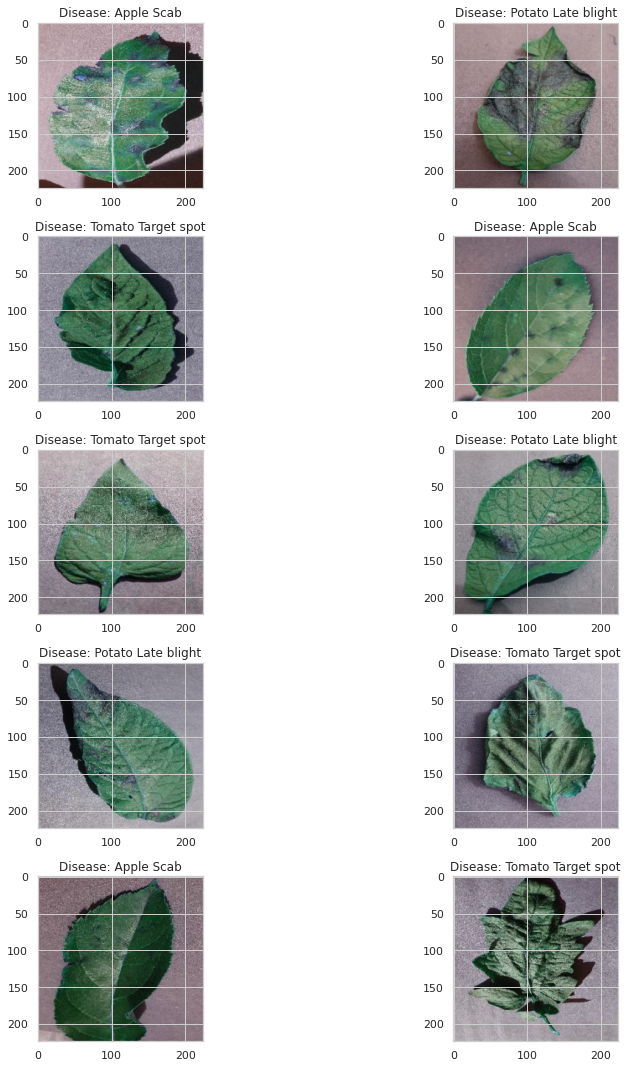

In [6]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Disease: '+Z[l])
        
plt.tight_layout()

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,10)
X=np.array(X)
X=X/255

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [9]:
x_train.shape

(4500, 224, 224, 3)

In [10]:
x_test.shape

(500, 224, 224, 3)

In [11]:
y_train.shape

(4500, 10)

In [12]:
y_test.shape

(500, 10)

In [0]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [14]:
model = Sequential()
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING, weights = RESNET50_WEIGHTS, input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS)))
model.add(BatchNormalization())
model.add(Dense(256, activation= DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(128, activation= DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(64, activation= DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(NUM_CLASSES, activation = OUTPUT_DENSE_LAYER_ACTIVATION))
model.layers[0].trainable = False

94773248/94765736 [==============================] - 1s 0us/step


In [0]:
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,factor=0.1)

In [0]:
Adam = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(optimizer=Adam, loss=OBJECTIVE_FUNCTION, metrics=LOSS_METRICS)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

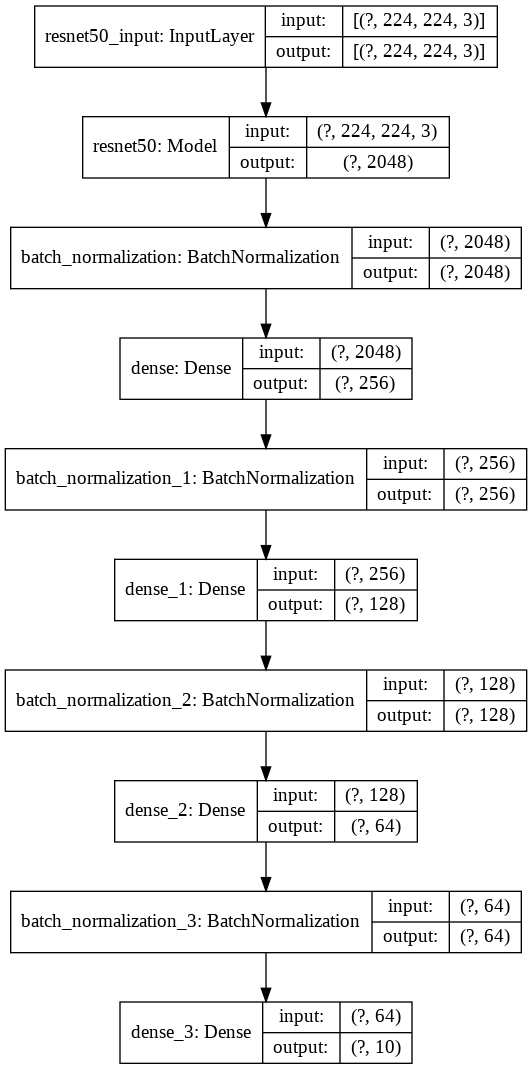

In [18]:
keras.utils.plot_model(model, "model_architecture.png", show_shapes=True)

In [19]:
History = model.fit(x_train, y_train, epochs=NUM_EPOCHS, batch_size= BATCH_SIZE, validation_data = (x_test,y_test))

Epoch 1/5
141/141 [==============================] - 369s 3s/step - loss: 1.2749 - accuracy: 0.5800 - val_loss: 2.4577 - val_accuracy: 0.1760
Epoch 2/5
141/141 [==============================] - 371s 3s/step - loss: 0.7832 - accuracy: 0.7371 - val_loss: 1.9677 - val_accuracy: 0.2240
Epoch 3/5
141/141 [==============================] - 366s 3s/step - loss: 0.6277 - accuracy: 0.7871 - val_loss: 1.0376 - val_accuracy: 0.6480
Epoch 4/5
141/141 [==============================] - 367s 3s/step - loss: 0.5466 - accuracy: 0.8153 - val_loss: 0.7491 - val_accuracy: 0.7380
Epoch 5/5
141/141 [==============================] - 367s 3s/step - loss: 0.4804 - accuracy: 0.8336 - val_loss: 0.6023 - val_accuracy: 0.8020


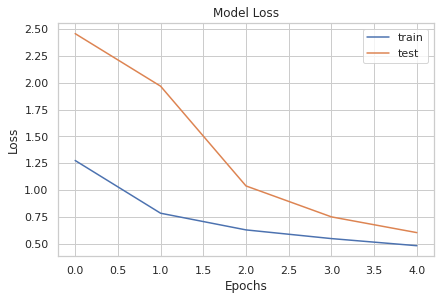

In [20]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

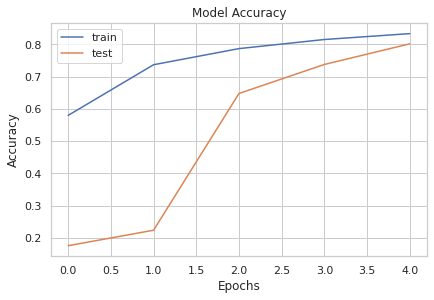

In [21]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

16/16 - 35s - loss: 0.6023 - accuracy: 0.8020

Test accuracy: 0.8019999861717224


Report : 
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        54
           1       0.96      0.41      0.58        63
           2       0.85      0.69      0.76        51
           3       0.77      0.84      0.80        44
           4       0.96      0.92      0.94        51
           5       0.88      0.85      0.87        54
           6       0.62      0.82      0.70        45
           7       0.76      0.98      0.86        55
           8       0.55      0.75      0.64        36
           9       0.87      0.87      0.87        47

    accuracy                           0.80       500
   macro avg       0.81      0.81      0.79       500
weighted avg       0.83      0.80      0.80       500



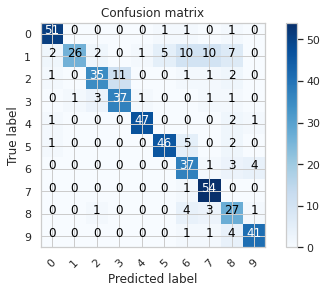

In [23]:
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#classification report
print('Report : ')
print(classification_report(Y_true, Y_pred_classes))

# Experimenting

In [26]:
from google.colab import files
import matplotlib.image as mpimg
from keras.preprocessing.image import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

result = model.predict(x)
np.argmax(result)
print(result)

Saving apple-blackrot-test.jpg to apple-blackrot-test.jpg
[[6.7103026e-04 9.0652113e-12 0.0000000e+00 1.9280753e-38 1.6683964e-12
  2.5669343e-04 4.2909263e-11 2.8458907e-17 1.0439593e-06 9.9907112e-01]]
